# Assignment 2 _ RM Malatji

- Data source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
- Github:

### Data Description

##### Analysis of company's ideal customers

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segmen

### MetaData
- Year_Birth: customer's year birth
- Education: education qualification of customer
- Marital_Status: marital status of custorsr
- Income: Customer's yearly household income
- 
Kidhome: Number of children in customer's househol
- Recency: Number of days since customer's last purchasedt.

In [86]:
import re
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Loading

In [78]:
df = pd.read_csv("./marketing_campaign.csv", sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Data Cleaning

### Select usable columns only

In [4]:
df = df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Dt_Customer', 'Recency','MntWines', 'MntFruits', 'Response' ]]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,Recency,MntWines,MntFruits,Response
0,5524,1957,Graduation,Single,58138.0,0,04-09-2012,58,635,88,1
1,2174,1954,Graduation,Single,46344.0,1,08-03-2014,38,11,1,0
2,4141,1965,Graduation,Together,71613.0,0,21-08-2013,26,426,49,0
3,6182,1984,Graduation,Together,26646.0,1,10-02-2014,26,11,4,0
4,5324,1981,PhD,Married,58293.0,1,19-01-2014,94,173,43,0


### Check for null values

In [5]:
df.isnull().sum()

ID                 0
Year_Birth         0
Education          0
Marital_Status     0
Income            24
Kidhome            0
Dt_Customer        0
Recency            0
MntWines           0
MntFruits          0
Response           0
dtype: int64

### Check for na values

In [6]:
df.isna().sum()

ID                 0
Year_Birth         0
Education          0
Marital_Status     0
Income            24
Kidhome            0
Dt_Customer        0
Recency            0
MntWines           0
MntFruits          0
Response           0
dtype: int64

### Check for duplicates and drop them

In [7]:
df.duplicated(keep=False).sum()

0

In [8]:
df = df.drop_duplicates(subset=['ID'])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,Recency,MntWines,MntFruits,Response
0,5524,1957,Graduation,Single,58138.0,0,04-09-2012,58,635,88,1
1,2174,1954,Graduation,Single,46344.0,1,08-03-2014,38,11,1,0
2,4141,1965,Graduation,Together,71613.0,0,21-08-2013,26,426,49,0
3,6182,1984,Graduation,Together,26646.0,1,10-02-2014,26,11,4,0
4,5324,1981,PhD,Married,58293.0,1,19-01-2014,94,173,43,0
...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,13-06-2013,46,709,43,0
2236,4001,1946,PhD,Together,64014.0,2,10-06-2014,56,406,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,25-01-2014,91,908,48,0
2238,8235,1956,Master,Together,69245.0,0,24-01-2014,8,428,30,0


### Check data types

In [9]:
df.dtypes

ID                  int64
Year_Birth          int64
Education          object
Marital_Status     object
Income            float64
Kidhome             int64
Dt_Customer        object
Recency             int64
MntWines            int64
MntFruits           int64
Response            int64
dtype: object

### Make Education to categorical

In [10]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [11]:
education_cat_map = {'Graduation': 1, 'PhD': 2, 'Master': 3, 'Basic': 4, '2n Cycle': 5}
education_cat_map_rev = {1: 'Graduation', 2: 'PhD',3: 'Master', 4:'Basic', 5:'2n Cycle'}

df['education'] = df['Education'].map(education_cat_map)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,Recency,MntWines,MntFruits,Response,education
0,5524,1957,Graduation,Single,58138.0,0,04-09-2012,58,635,88,1,1
1,2174,1954,Graduation,Single,46344.0,1,08-03-2014,38,11,1,0,1
2,4141,1965,Graduation,Together,71613.0,0,21-08-2013,26,426,49,0,1
3,6182,1984,Graduation,Together,26646.0,1,10-02-2014,26,11,4,0,1
4,5324,1981,PhD,Married,58293.0,1,19-01-2014,94,173,43,0,2


### Make Year_Birth to int

In [12]:
# print(df['Year_Birth'].dtypes)
# df['Year_Birth'].astype(int)
# df['Year_Birth'].dtypes

### Change marital status to categorical

In [13]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [14]:
marital_status_map = {'Single': 1, 'Together': 2, 'Married': 3, 'Divorced': 4, 'Widow': 5, 'Alone': 6,
       'Absurd': 7, 'YOLO': 8}
marital_status_map_rev = {1:'Single', 2:'Together', 3:'Married', 4:'Divorced', 5:'Widow', 6:'Alone',
       7:'Absurd', 8: 'YOLO'}

df['marital_status'] = df['Marital_Status'].map(marital_status_map)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,Recency,MntWines,MntFruits,Response,education,marital_status
0,5524,1957,Graduation,Single,58138.0,0,04-09-2012,58,635,88,1,1,1
1,2174,1954,Graduation,Single,46344.0,1,08-03-2014,38,11,1,0,1,1
2,4141,1965,Graduation,Together,71613.0,0,21-08-2013,26,426,49,0,1,2
3,6182,1984,Graduation,Together,26646.0,1,10-02-2014,26,11,4,0,1,2
4,5324,1981,PhD,Married,58293.0,1,19-01-2014,94,173,43,0,2,3


### Change the Dt_Customer to date type

In [15]:
df['Dt_Customer'].dtypes

dtype('O')

In [16]:
df['date_customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
df['date_customer'].dtypes

dtype('<M8[ns]')

In [17]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,Recency,MntWines,MntFruits,Response,education,marital_status,date_customer
0,5524,1957,Graduation,Single,58138.0,0,04-09-2012,58,635,88,1,1,1,2012-09-04
1,2174,1954,Graduation,Single,46344.0,1,08-03-2014,38,11,1,0,1,1,2014-03-08
2,4141,1965,Graduation,Together,71613.0,0,21-08-2013,26,426,49,0,1,2,2013-08-21
3,6182,1984,Graduation,Together,26646.0,1,10-02-2014,26,11,4,0,1,2,2014-02-10
4,5324,1981,PhD,Married,58293.0,1,19-01-2014,94,173,43,0,2,3,2014-01-19


In [18]:
df.dtypes

ID                         int64
Year_Birth                 int64
Education                 object
Marital_Status            object
Income                   float64
Kidhome                    int64
Dt_Customer               object
Recency                    int64
MntWines                   int64
MntFruits                  int64
Response                   int64
education                  int64
marital_status             int64
date_customer     datetime64[ns]
dtype: object

# Statistical Description

In [19]:
df.dtypes

desc_stat = df[['Year_Birth','Income', 'Kidhome', 'Recency','MntWines', 'MntFruits', 'Response', 'education', 'marital_status' ]]
desc_stat.head()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,Response,education,marital_status
0,1957,58138.0,0,58,635,88,1,1,1
1,1954,46344.0,1,38,11,1,0,1,1
2,1965,71613.0,0,26,426,49,0,1,2
3,1984,26646.0,1,26,11,4,0,1,2
4,1981,58293.0,1,94,173,43,0,2,3


In [20]:
desc_stat.dtypes

Year_Birth          int64
Income            float64
Kidhome             int64
Recency             int64
MntWines            int64
MntFruits           int64
Response            int64
education           int64
marital_status      int64
dtype: object

### std mean, count, max, min, standard, quantiles

In [21]:
desc_stat.describe()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,Response,education,marital_status
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,49.109375,303.935714,26.302232,0.149107,1.982143,2.496875
std,11.984069,25173.076661,0.538398,28.962453,336.597393,39.773434,0.356274,1.257276,1.073864
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1959.000000,35303.000000,0.000000,24.000000,23.750000,1.000000,0.000000,1.000000,2.000000
50%,1970.000000,51381.500000,0.000000,49.000000,173.500000,8.000000,0.000000,1.000000,3.000000
75%,1977.000000,68522.000000,1.000000,74.000000,504.250000,33.000000,0.000000,3.000000,3.000000
max,1996.000000,666666.000000,2.000000,99.000000,1493.000000,199.000000,1.000000,5.000000,8.000000


### Highest frequency data 

In [22]:
df.describe(include=['object'])

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


### Range of columns

In [23]:
(desc_stat.max() - desc_stat.min()).to_frame().T

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,Response,education,marital_status
0,103.0,664936.0,2.0,99.0,1493.0,199.0,1.0,4.0,7.0


### Kid Count

In [80]:
#shows total number (Highest number of children and lowest number of children)

In [79]:
desc_stat['Kidhome'].value_counts().to_frame()

,count
Kidhome,
0,1293
1,899
2,48


## Majority customer Birth year range

In [24]:
desc_stat['Year_Birth'].value_counts().to_frame()

,count
Year_Birth,
1976,89
1971,87
1975,83
1972,79
1978,77
1970,77
1973,74
1965,74
1969,71


### Sum of each column

In [25]:
desc_stat.sum().to_frame().T

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,Response,education,marital_status
0,4410125.0,115779909.0,995.0,110005.0,680816.0,58917.0,334.0,4440.0,5593.0


### z Scores Calculation

In [76]:
#showing how many standard deviations each data point is away from the mean

In [26]:
def zscore(x):
    return(x - x.mean())/ x.std()

zscore_all = desc_stat.apply(zscore)
zscore_all.head(2240).style.hide(axis="index")

Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,Response,education,marital_status
-0.985125,0.234010,-0.825033,0.306971,0.983562,1.551231,2.388313,-0.781167,-1.393915
-1.235457,-0.234507,1.032328,-0.383579,-0.870285,-0.636159,-0.418519,-0.781167,-1.393915
-0.317572,0.769304,-0.825033,-0.797908,0.362642,0.570677,-0.418519,-0.781167,-0.462698
1.267866,-1.017009,1.032328,-0.797908,-0.870285,-0.560732,-0.418519,-0.781167,-0.462698
1.017534,0.240167,1.032328,1.549959,-0.388998,0.419822,-0.418519,0.014203,0.468518
-0.150684,0.407807,-0.825033,-1.143183,0.641907,0.394680,-0.418519,0.809573,-0.462698
0.183093,0.134578,-0.825033,-0.521688,-0.204802,0.972955,-0.418519,-0.781167,1.399735
1.351310,-0.746562,1.032328,-0.590743,-0.677176,-0.409877,-0.418519,0.014203,0.468518
0.433425,-0.869828,1.032328,-1.039600,-0.861372,-0.661302,2.388313,0.014203,-0.462698
-1.569234,-1.851154,1.032328,0.652245,-0.819780,-0.661302,-0.418519,0.014203,-0.462698


### Kurtosis

In [27]:
#Kurtosis for all the columns in the data 

In [28]:
desc_stat.kurtosis().to_frame().T

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,Response,education,marital_status
0,0.717464,159.6367,-0.779661,-1.201897,0.598744,4.050976,1.888714,0.433248,0.301627


### Skewness

In [29]:
#Skewness for all the columns in the data

In [30]:
desc_stat.skew().to_frame().T

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,Response,education,marital_status
0,-0.349944,6.763487,0.635288,-0.001987,1.175771,2.102063,1.971555,1.202374,0.386055


# Data Visualization

### Correlation

In [31]:
desc_stat.corr().style.background_gradient('RdPu')

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,Response,education,marital_status
Year_Birth,1.000000,-0.161791,0.230176,-0.019871,-0.157773,-0.017917,0.021325,0.036971,-0.138746
Income,-0.161791,1.000000,-0.428669,-0.003970,0.578650,0.430842,0.133047,-0.092809,0.023956
Kidhome,0.230176,-0.428669,1.000000,0.008827,-0.496297,-0.372581,-0.080008,0.028878,-0.050514
Recency,-0.019871,-0.003970,0.008827,1.000000,0.016064,-0.004306,-0.198437,-0.025753,-0.021048
MntWines,-0.157773,0.578650,-0.496297,0.016064,1.000000,0.389637,0.247254,-0.067017,0.034272
MntFruits,-0.017917,0.430842,-0.372581,-0.004306,0.389637,1.000000,0.125289,-0.060599,0.014416
Response,0.021325,0.133047,-0.080008,-0.198437,0.247254,0.125289,1.000000,-0.018980,-0.006953
education,0.036971,-0.092809,0.028878,-0.025753,-0.067017,-0.060599,-0.018980,1.000000,-0.000703
marital_status,-0.138746,0.023956,-0.050514,-0.021048,0.034272,0.014416,-0.006953,-0.000703,1.000000


### Covariance

In [57]:
desc_stat.cov().style.background_gradient('RdPu')

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,Response,education,marital_status
Year_Birth,143.617921,-48814.621201,1.485139,-6.897017,-636.423834,-8.540209,0.091050,0.557049,-1.785556
Income,-48814.621201,633683788.575619,-5793.603194,-2892.836586,4913651.567032,431589.325364,1197.059729,-2935.176159,647.285099
Kidhome,1.485139,-5793.603194,0.289873,0.137638,-89.940614,-7.978437,-0.015347,0.019548,-0.029205
Recency,-6.897017,-2892.836586,0.137638,838.823673,156.601943,-4.959824,-2.047580,-0.937751,-0.654638
MntWines,-636.423834,4913651.567032,-89.940614,156.601943,113297.804709,5216.313319,29.650947,-28.361131,12.387919
MntFruits,-8.540209,431589.325364,-7.978437,-4.959824,5216.313319,1581.926033,1.775370,-3.030331,0.615728
Response,0.091050,1197.059729,-0.015347,-2.047580,29.650947,1.775370,0.126931,-0.008502,-0.002660
education,0.557049,-2935.176159,0.019548,-0.937751,-28.361131,-3.030331,-0.008502,1.580744,-0.000949
marital_status,-1.785556,647.285099,-0.029205,-0.654638,12.387919,0.615728,-0.002660,-0.000949,1.153184


### Box plots

In [33]:
#These box plots show the outliers for each column

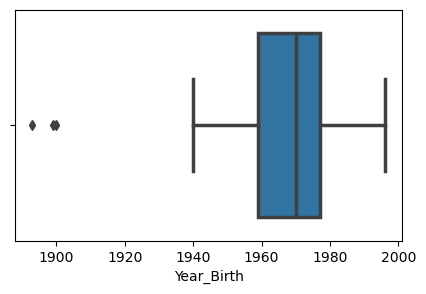

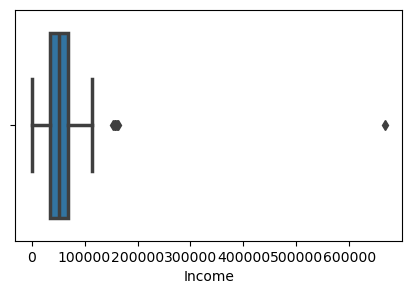

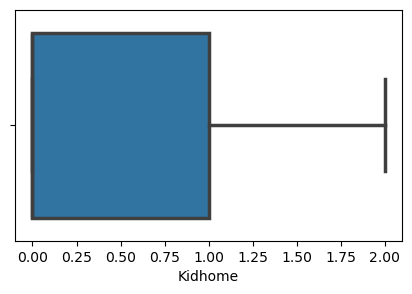

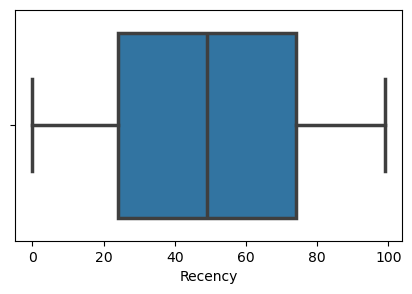

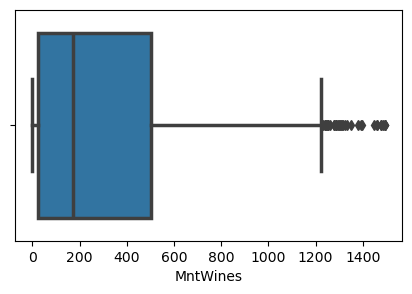

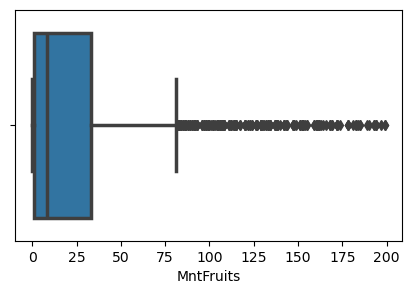

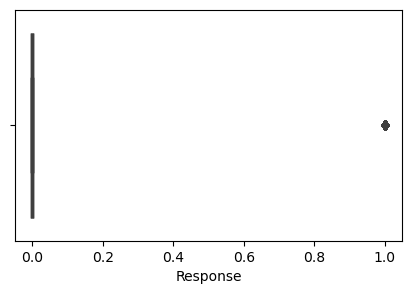

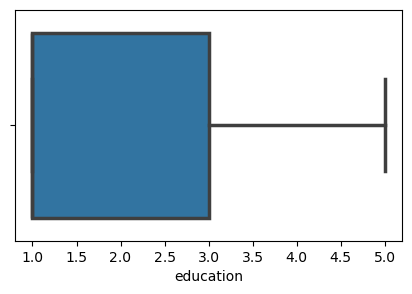

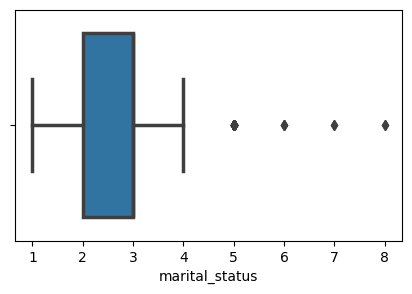

In [34]:
for col in desc_stat:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=desc_stat[f'{col}'], linewidth=2.5)

## PairPlot of all the Data

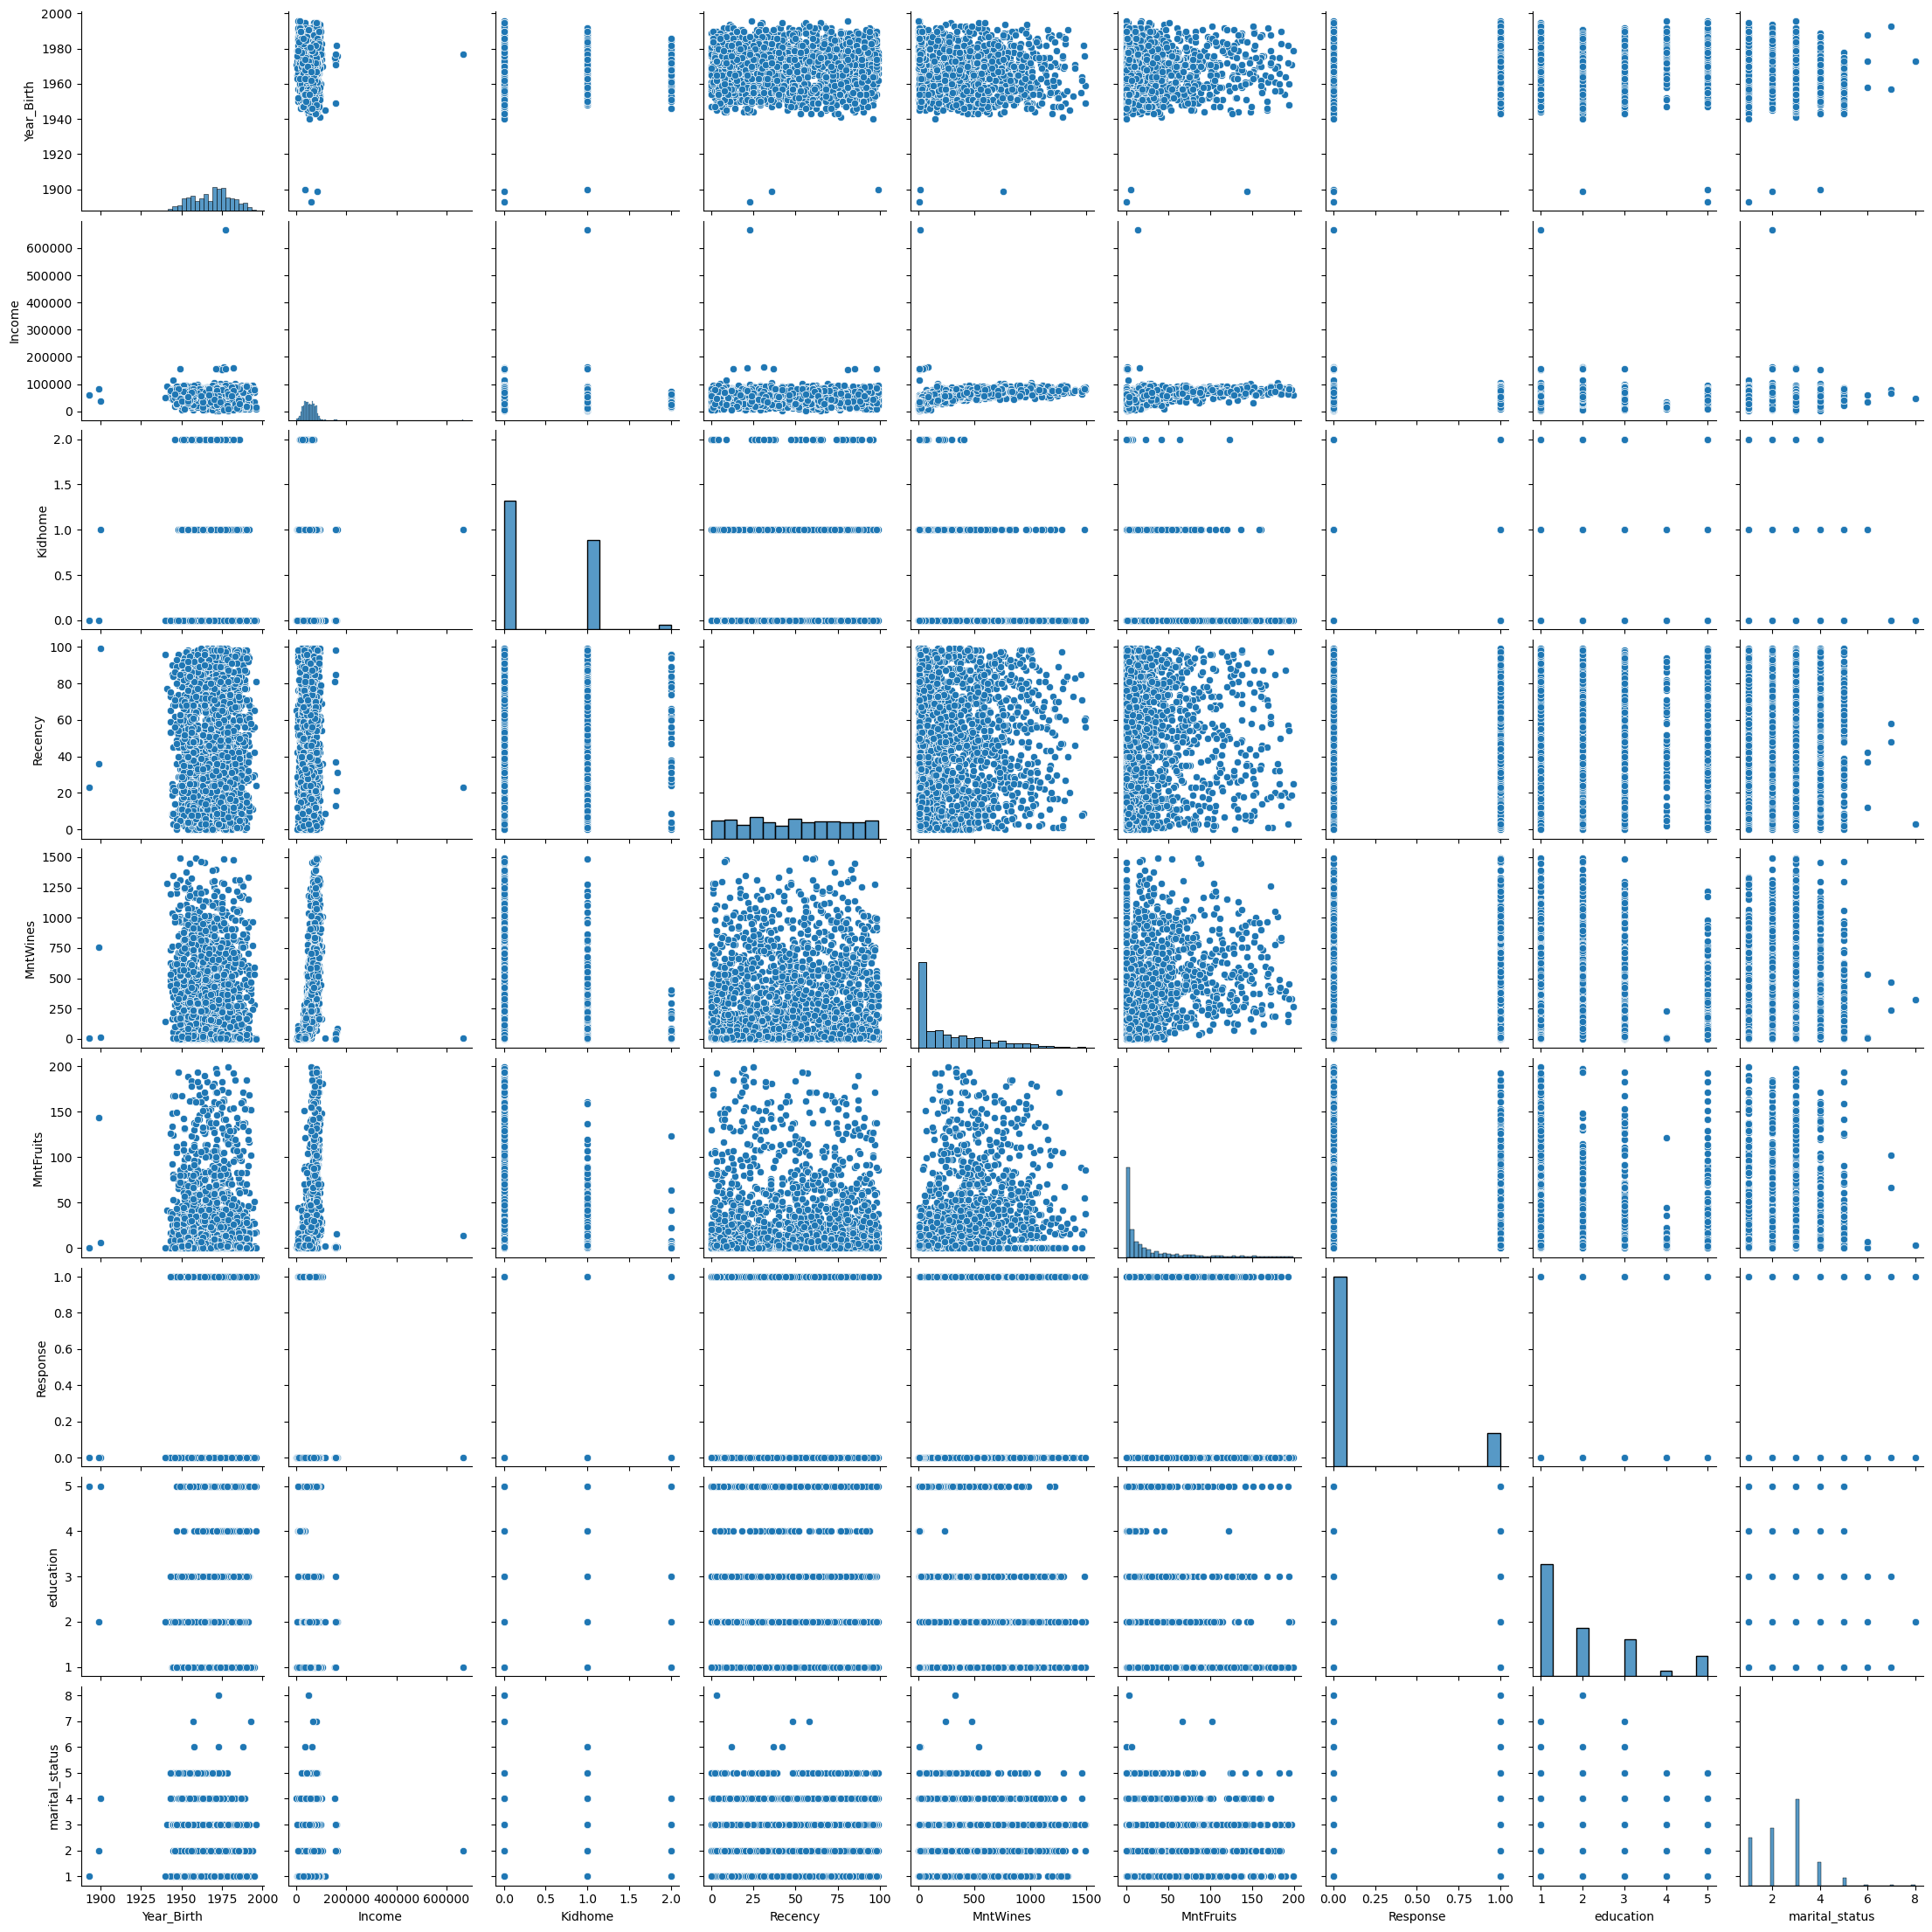

In [35]:
sns.pairplot(desc_stat)

## Pie chart showing the distriibution of the education among the customers

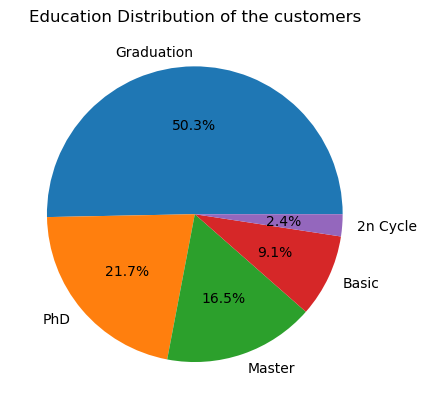

In [36]:
edu_count=desc_stat['education'].value_counts()
labels = ['Graduation','PhD','Master','Basic', '2n Cycle']

plt.pie(edu_count,labels=labels, autopct='%1.1f%%')
plt.title('Education Distribution of the customers')
plt.show()

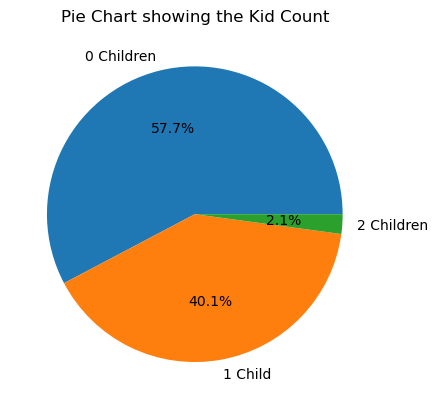

In [85]:
kid_count=desc_stat['Kidhome'].value_counts()
labels = ['0 Children','1 Child','2 Children']

plt.pie(kid_count,labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart showing the Kid Count')

plt.show()

## Bar Graph showing the income differences for all Marital Statuses

<function matplotlib.pyplot.show(close=None, block=None)>

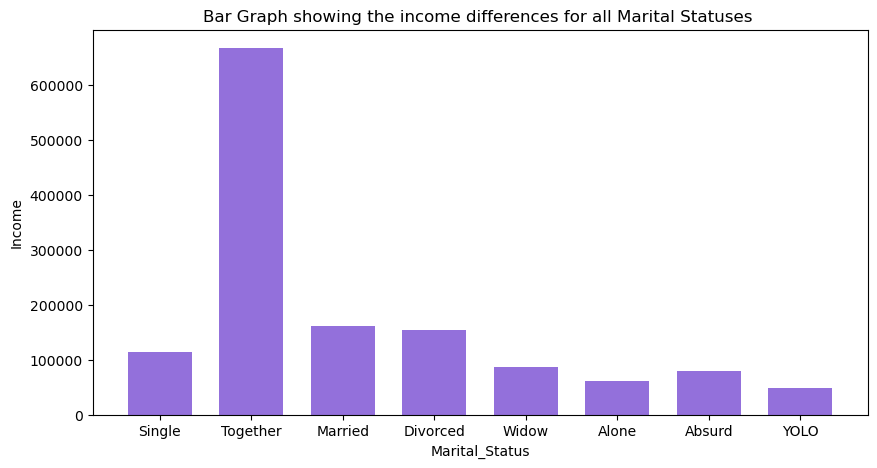

In [38]:
x=df['Marital_Status']
y=df['Income']
labels = df['Marital_Status']
plt.figure(figsize=(10,5))
plt.bar(x,y,label=labels,color='mediumpurple',width=0.7)
plt.xlabel("Marital_Status")
plt.ylabel("Income")
plt.title('Bar Graph showing the income differences for all Marital Statuses ') 
plt.show


<Axes: xlabel='Year_Birth', ylabel='Income'>

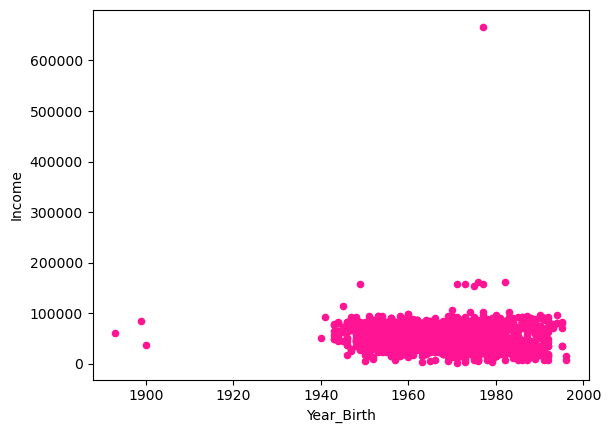

In [39]:
df.plot(x='Year_Birth', y='Income', kind='scatter',color='deeppink')

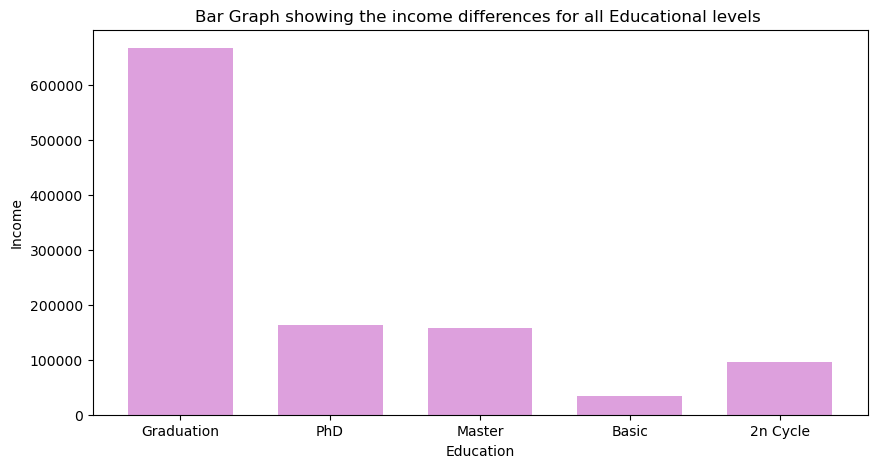

In [40]:
x=df['Education']
y=df['Income']
labels = df['Education']
plt.figure(figsize=(10,5))
plt.bar(x,y,label=labels,color='plum',width=0.7)
plt.xlabel("Education")
plt.ylabel("Income")
plt.title('Bar Graph showing the income differences for all Educational levels ') 
plt.show()


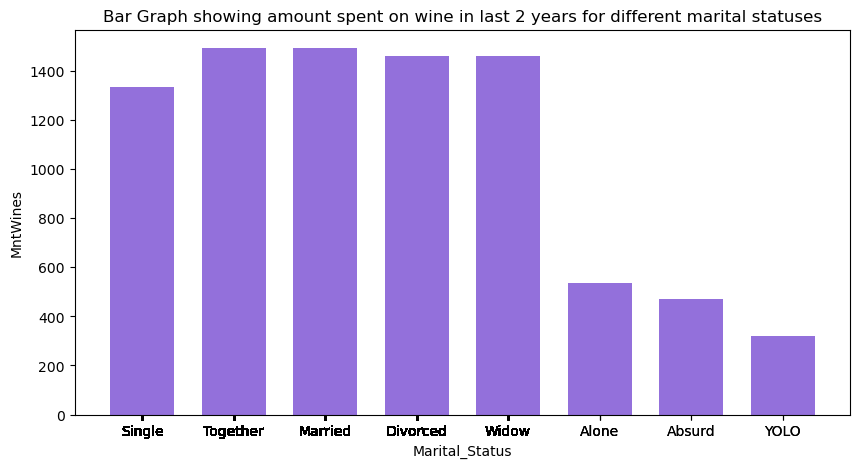

In [41]:
x=desc_stat['marital_status']
y=desc_stat['MntWines']
tick_labels = df['Marital_Status']
plt.figure(figsize=(10,5))
plt.bar(x,y,tick_label=tick_labels,color='mediumpurple',width=0.7)
plt.xlabel("Marital_Status")
plt.ylabel("MntWines")
plt.title('Bar Graph showing amount spent on wine in last 2 years for different marital statuses') 
plt.show()

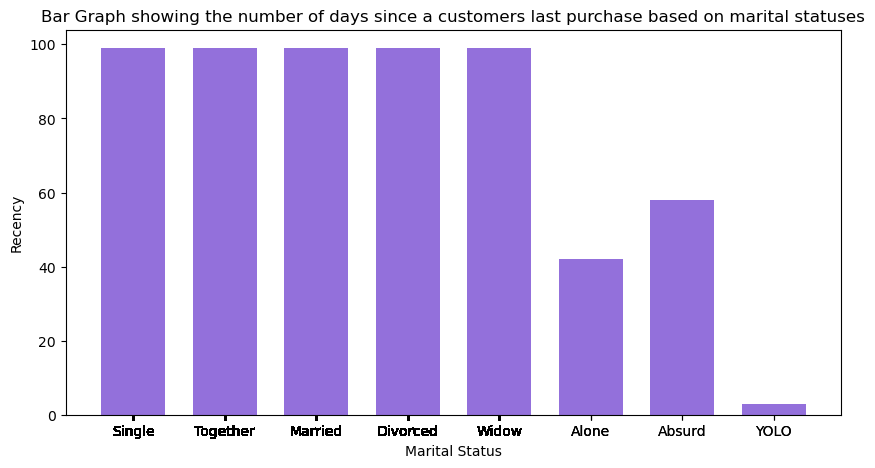

In [75]:
x=desc_stat['marital_status']
y=desc_stat['Recency']
tick_labels = df['Marital_Status']
plt.figure(figsize=(10,5))
plt.bar(x,y,tick_label=tick_labels,color='mediumpurple',width=0.7)
plt.xlabel("Marital Status")
plt.ylabel("Recency")
plt.title('Bar Graph showing the number of days since a customers last purchase based on marital statuses') 
plt.show()

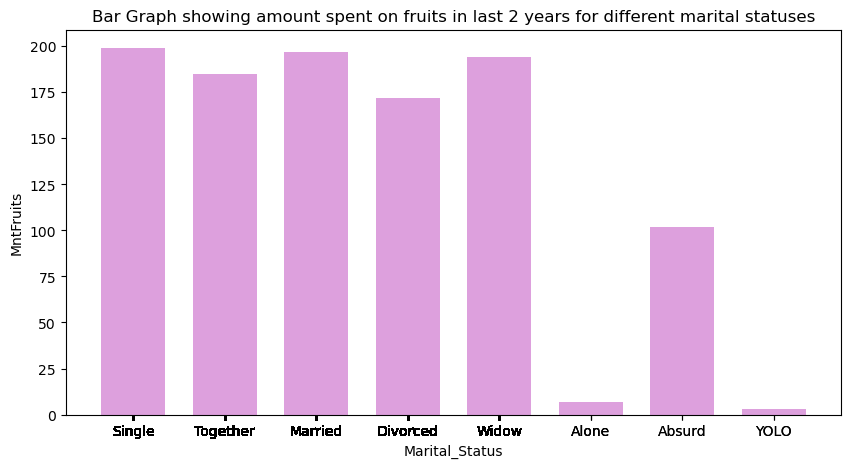

In [43]:
x=desc_stat['marital_status']
y=desc_stat['MntFruits']
tick_labels = df['Marital_Status']
plt.figure(figsize=(10,5))
plt.bar(x,y,tick_label=tick_labels,color='plum',width=0.7)
plt.xlabel("Marital_Status")
plt.ylabel("MntFruits")
plt.title('Bar Graph showing amount spent on fruits in last 2 years for different marital statuses') 
plt.show()

<Axes: xlabel='Education', ylabel='Income'>

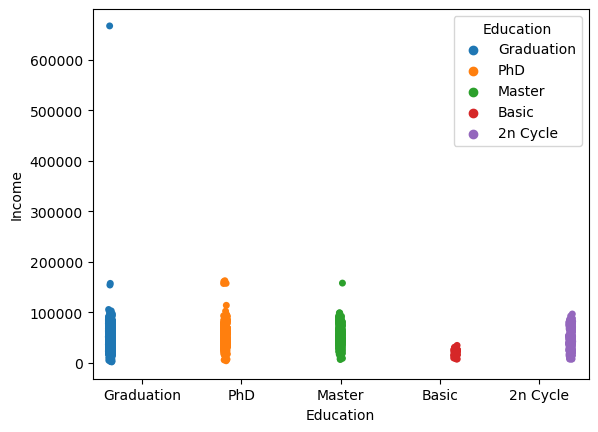

In [44]:
sns.stripplot(x="Education", y="Income", data=df, hue="Education",dodge=True)

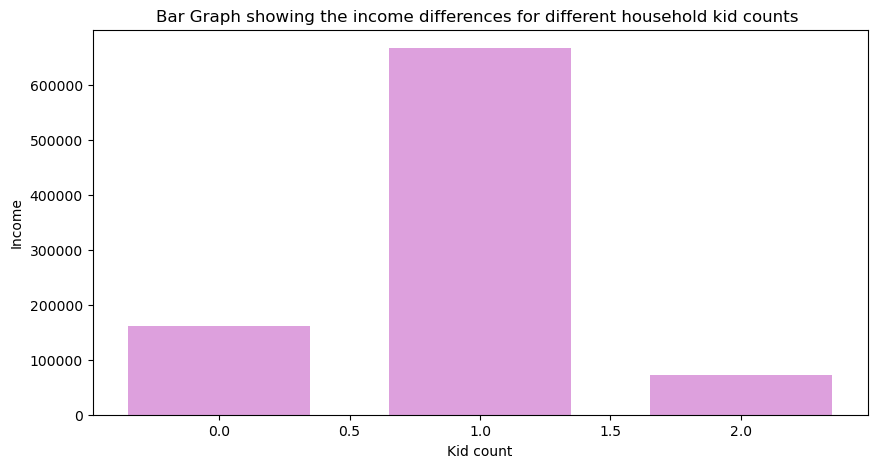

In [45]:
x=desc_stat['Kidhome']
y=desc_stat['Income']
labels = desc_stat['Kidhome']
plt.figure(figsize=(10,5))
plt.bar(x,y,label=labels,width=0.7,color='plum')
plt.xlabel("Kid count")
plt.ylabel("Income")
plt.title('Bar Graph showing the income differences for different household kid counts ') 
plt.show()


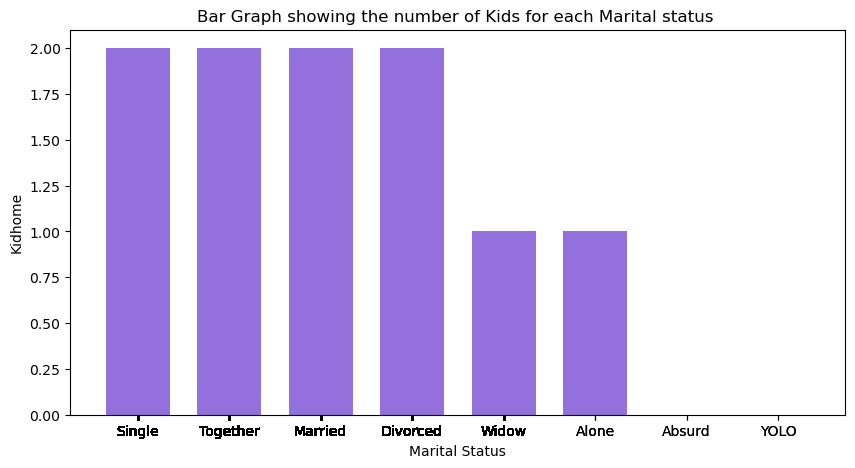

In [46]:
x=desc_stat['marital_status']
y=desc_stat['Kidhome']
tick_labels = df['Marital_Status']
plt.figure(figsize=(10,5))
plt.bar(x,y,tick_label=tick_labels,width=0.7,color='mediumpurple')
plt.xlabel("Marital Status")
plt.ylabel("Kidhome")
plt.title('Bar Graph showing the number of Kids for each Marital status ') 
plt.show()

<Axes: xlabel='Education', ylabel='Year_Birth'>

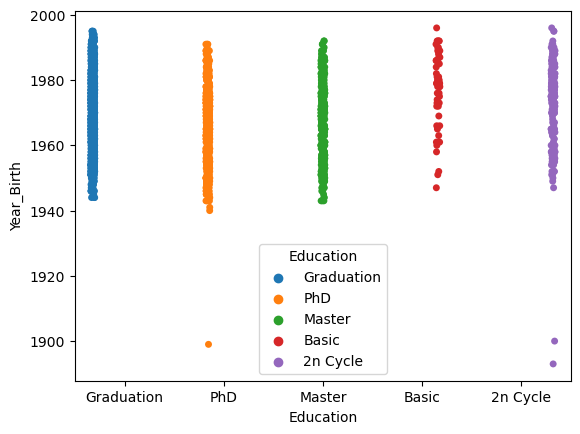

In [47]:
sns.stripplot(x="Education", y="Year_Birth", data=df, hue="Education", dodge=True)

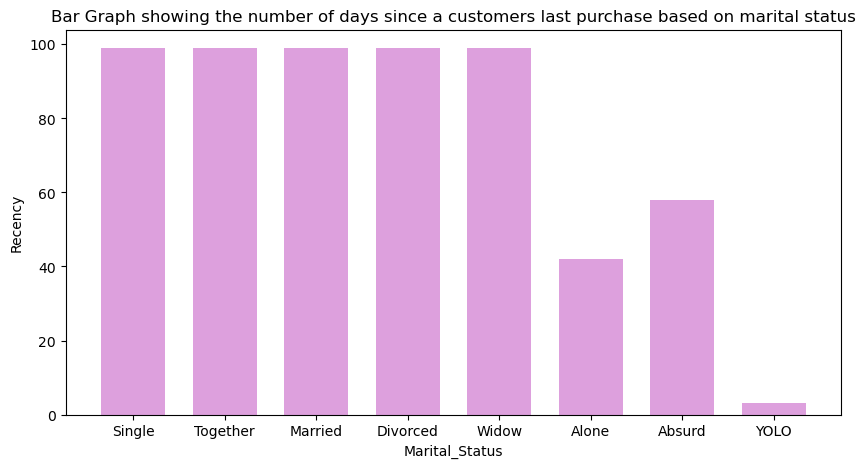

In [48]:
x=df['Marital_Status']
y=df['Recency']
labels = df['Marital_Status']
plt.figure(figsize=(10,5))
plt.bar(x,y,label=labels,width=0.7,color='plum')
plt.xlabel("Marital_Status")
plt.ylabel("Recency")
plt.title('Bar Graph showing the number of days since a customers last purchase based on marital status') 
plt.show()

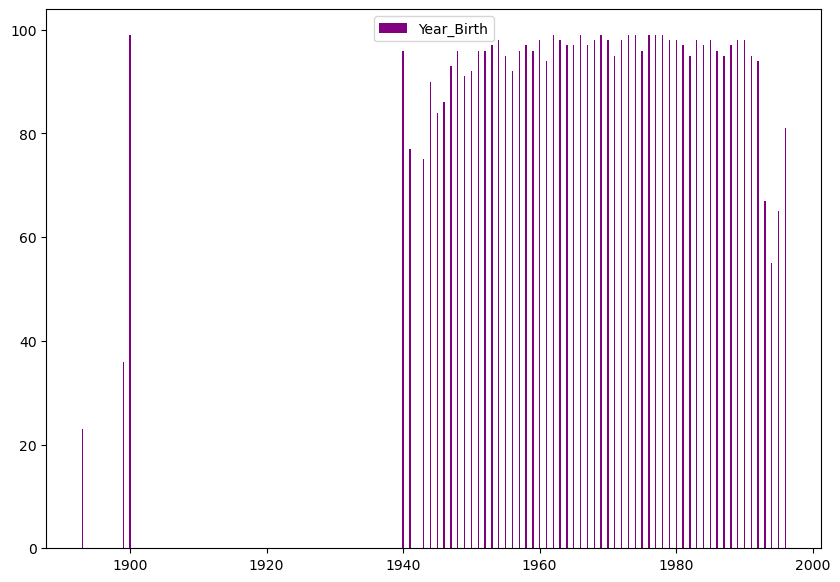

In [72]:
plt.figure(figsize=(10,7))
barWidth= 0.2
plt.bar(df['Year_Birth'], color='purple',height= desc_stat['Recency'] ,width=barWidth,label='Year_Birth')
plt.legend()

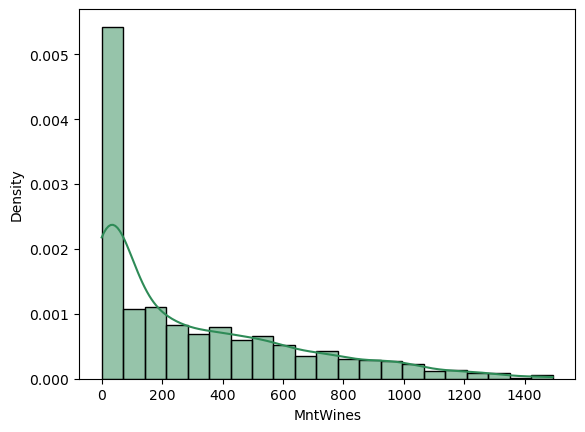

In [49]:
plt.figure()
sns.histplot(df['MntWines'],kde= True, stat="density",color='seagreen')
plt.show()

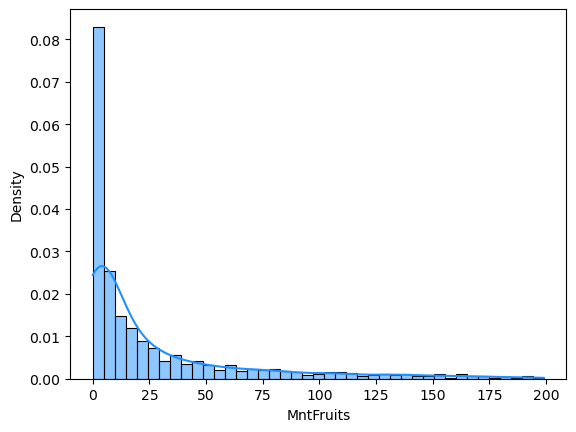

In [50]:
plt.figure()
sns.histplot(df['MntFruits'],kde= True, stat="density",color='dodgerblue')
plt.show()

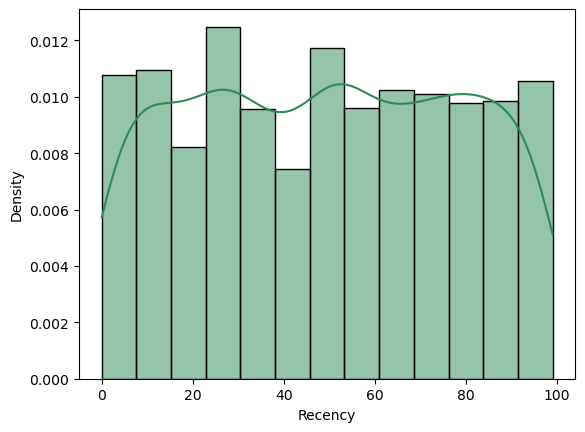

In [51]:
plt.figure()
sns.histplot(df['Recency'],kde= True, stat="density",color='seagreen')
plt.show()

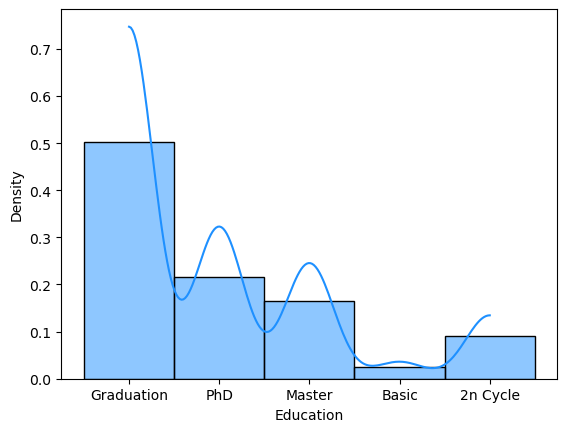

In [52]:
plt.figure()
sns.histplot(df['Education'],kde= True, stat="density",color='dodgerblue')
plt.show()

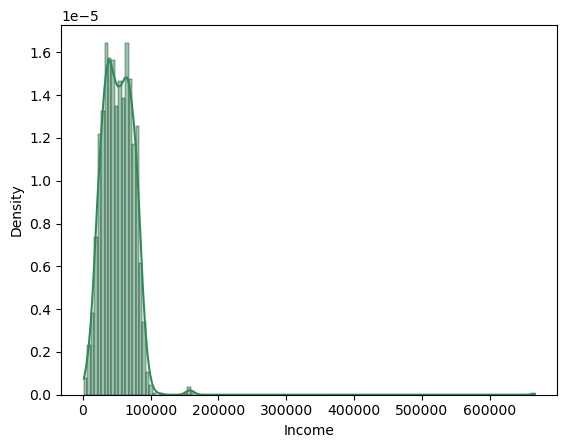

In [53]:
plt.figure()
sns.histplot(desc_stat['Income'],kde= True, stat="density",color='seagreen')
plt.show()

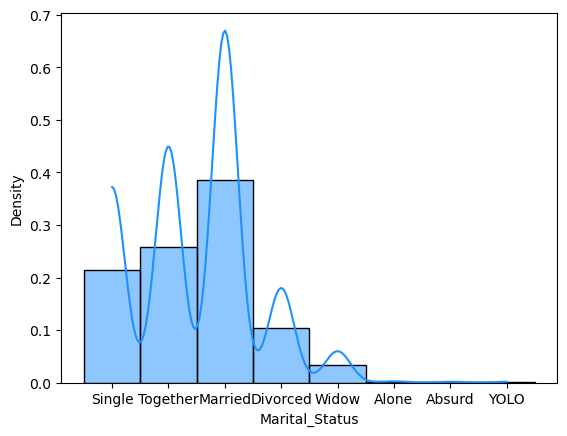

In [54]:
plt.figure()
sns.histplot(df['Marital_Status'],kde= True, stat="density",color='dodgerblue')
plt.show()

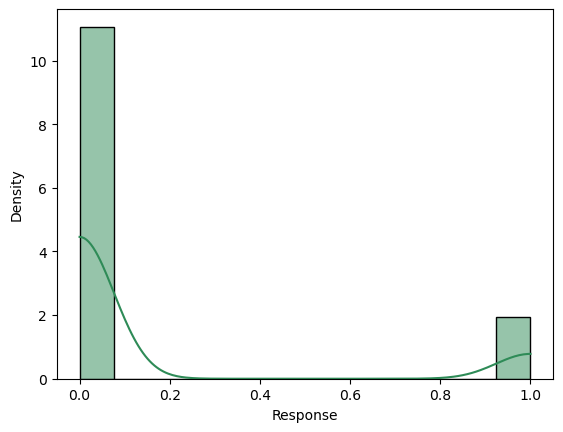

In [55]:
plt.figure()
sns.histplot(desc_stat['Response'],kde= True, stat="density",color='seagreen')
plt.show()



------------------------------------------------------------------------------------------------------------

## Data Conclusion 

Based on the data what can be concluded is that the highest occuring customers are both graduates and are married. Where we have the occurence of Graduates being at 1127 and married individuals at 864. What also can be seen is that "Married", "Together" people spend the most out of all the others on wine for the past 2 years while the Singles and married individules have spent the most on fruits whitin the past 2 years.Signifying that married people spend more than the other marital statuses. 
Individuals with graduation under their belt have the highest income of all the other education levels. While looking at Income, what can be seen is that households with a single child have a higher income compared to households with zero or two children. 
Majority single, together, married and divorced people have two children while widows and people who are alone have one child. Leaving Absurd and YOLO with no children. The kurtosis value of -0.779661 for Kidhome suggests a flatter distribution compared to normal. This means there are fewer families with a very high number of children at home, majority have 0 children.

The highest age demographic is between 1976 and 1944. 
The skewness for Year_Birth and Recency being negative, also confirmed with the Kurtosis for Recency being negative signifying a flatter distribution. While the Kurtosis for Year birth is 0.717464 which is positve and almost 1 this shows a slightly peaked distribution compared to a normal distribution. 1900 has the highest recency, which means they have the highest number of days since they made a last purchase, whilest during the 1800 it was the lowest recency we will still look at the the time period between 1976 and 1944 because there are more customers during that period of time and displays a more data varieation for the customers during that period of time. There is also a higher income range between the birth years 1944-1990. 
Another interesting thing about the customer data is that there is a high number of their customer base thatb are generat graduates, and second highest are PhD holders whith Masters coming in third. This does show that the company's customer base is more fixed towards 'Academics'. And the overal income is higher for graduates compared to all the others. What can be seen as well is that the "Graduates", "PhD" and "Master" holders are between the birth years 1944-1990, which signifies the companies customer base is between the ages 34-80. And this can also be confirmed with the skewness, Year_Birth with a negative skew, implies there are more people born in earlier years compared to recent years. 

What can be seen is that there is no strong relationship or correlation within the customer data, mainly by looking at the variation of correlations for all the different columns data points. The correlations are not close to 1 or -1 suggesting these relationships are not very strong. What I can deduce from this is that the changes in one variable don't necessarily cause large or consistent changes in the other variables.

------------------------------------------------------------------------------------------------------------

## Reflections on your learnings between this assignment and the previous one

1. What was different between Python and Excel?
   
Excel: With excel you can enter data and use formulas for calculations, but you're limited to the features built-in. For complex analysis, 
you might need to get creative with workarounds and it may take a bit more time to get the desired answer you want from complex equations.
I could probably use formulas for some basic stats, but for this massive dataset, it felt slow and clunky.
Plus, keeping track of all the steps is a nightmare.

Python: With Python code and libraries like Pandas, you have complete control over how you manipulate and analyze the data. 
It seemed scary at first, but it is built for handling large data sets efficiently. The code can run calculations on thousands or even millions of 
data points much faster than Excel. Plus, it's easier to scale up your analysis by adding more code
I could write code to calculate everything I needed, and it was way faster.

2. When will you use either of them?
   
Excel: Great for small datasets and quick calculations I need to see right away.

Python: When I'm dealing with big data or need to automate calculations and analysis. Plus, the code can be saved and reused later.

3. If you could do this assignment over what would you do differently?
   
I should have reached out to the lecturer earlier, he could have helped me avoid some dead ends and made sure I was on the right track. 
I found some helpful code snippets online and Github repos, but next time, I'll explore GitHub more and dive deeper to find more useful sources. 
There's probably a whole community out there with Python code for stuff like this.

4. What are the gaps in your programming or stats knowledge?
   
Programming: My coding skills need work! This assignment showed me the power of Python, 
but I spent a lot of time searching for resources to understand the code I was using and ways to clean my data so I would be able to use it. 

Stats Review: High school stats were a while ago. I needed to brush up on some concepts before tackling this big data analysis.